In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
# import matplotlib as mpl


In [2]:
# 使用matplotlib显示opencv图片，用于显示
def matshow(title='image',image=None,gray=False):

    if isinstance(image,np.ndarray):
        if len(image.shape) ==2:
            pass
        elif gray == True:
            # 转化opencv的颜色空间为gray
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            # 转化opencv的颜色空间为RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    # 使用plt载入opencv图片
    plt.imshow(image,cmap='gray')
    
    plt.axis('off') # 不显示坐标轴
    plt.title(title) # 图像标题
    # 如果第一遍运行不显示图像，运行第二次就会正常了
    plt.show()


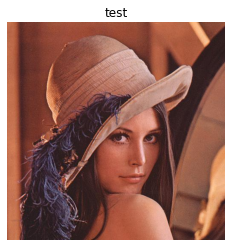

In [3]:
import cv2
# 读取一副图像 第一个参数是图像路径
# 第二个参数代表读取方式，1表示3通道彩色，0表示单通道灰度
im = cv2.imread(r"Lena.png",1)
# 在"test"窗口中显示图像im
matshow("test",im)


In [4]:
# 打印图像数据的数据结构类型
print(type(im))
# 打印图像的尺寸
print(im.shape)


<class 'numpy.ndarray'>
(512, 512, 3)


In [5]:
# 将图像保存到指定路径
cv2.imwrite('lena.jpg',im)


True

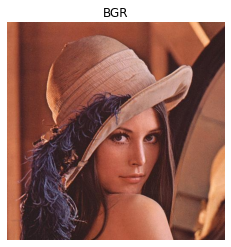

In [6]:
import cv2
im = cv2.imread(r"lena.jpg")
matshow("BGR",im)
# 使用cvtColor进行颜色空间变化 cv2.COLOR_BGR2GRAY 代表BGR to gray


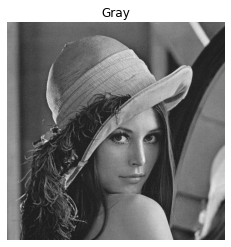

In [7]:
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
matshow("Gray",img_gray)


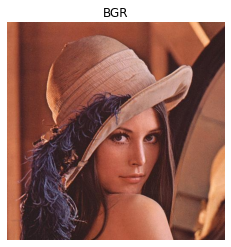

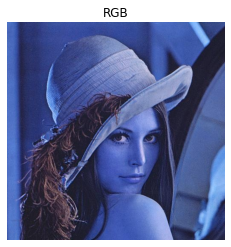

In [8]:
import cv2
im = cv2.imread(r"lena.jpg")
matshow("BGR",im)
# 使用cvtColor进行颜色空间变化 cv2.COLOR_BGR2RGB 代表BGR to RGB
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# 当图像数据为3通道时，imshow函数认为数据是BGR的
# 使用imshow显示RGB数据，会发现图片显示颜色畸变
matshow("RGB",im_rgb)


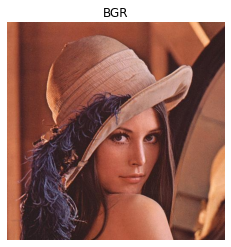

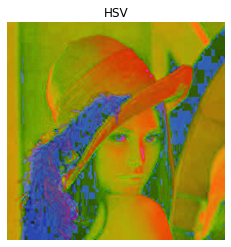

In [9]:
import cv2
im = cv2.imread(r"lena.jpg")
matshow("BGR",im)
# 使用cvtColor进行颜色空间变化 cv2.COLOR_BGR2HSV 代表BGR to HSV
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
# 当图像数据为3通道时，imshow函数认为数据是BGR的
# 使用imshow显示HSV数据，会将HSV分量强行当做BGR进行显示
matshow("HSV",im_hsv)


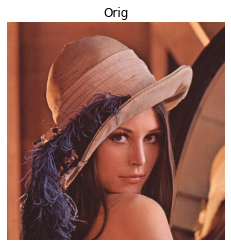

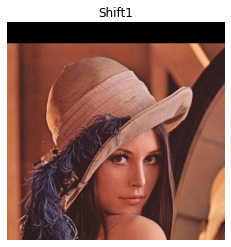

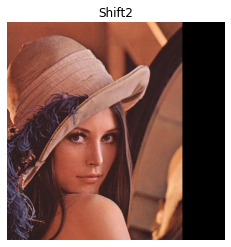

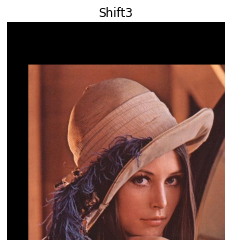

In [10]:
import numpy as np
import cv2
# 定义平移translate函数
def translate(img, x, y):
    # 获取图像尺寸
    (h, w) = img.shape[:2]
    
    # 定义平移矩阵
    M = np.float32([[1, 0, x], [0, 1, y]])
    
    # 使用OpenCV仿射变换函数实现平移操作
    shifted = cv2.warpAffine(img, M, (w, h))

    # 返回转换后的图像
    return shifted

# 加载图像并显示
im = cv2.imread('lena.jpg')
matshow("Orig", im)

# 对原图做平移操作
# 下移50像素
shifted = translate(im, 0, 50)
matshow("Shift1", shifted)
# 左移100像素
shifted = translate(im, -100, 0)
matshow("Shift2", shifted)
# 右移50，下移100像素
shifted = translate(im, 50, 100)
matshow("Shift3", shifted)


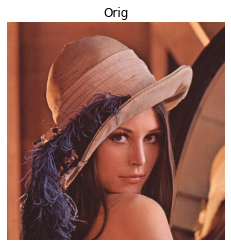

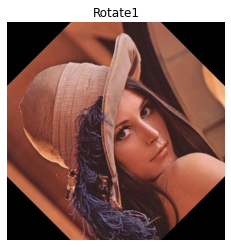

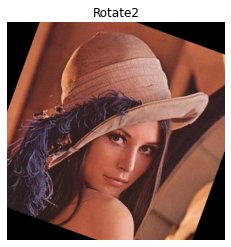

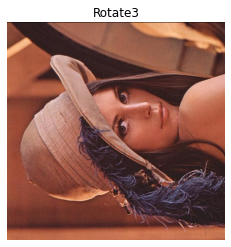

In [11]:
import numpy as np
import cv2

# 定义旋转rotate函数
def rotate(img, angle, center=None, scale=1.0):
    # 获取图像尺寸
    (h, w) = img.shape[:2]

    # 旋转中心的缺失值为图像中心
    if center is None:
        center = (w / 2, h / 2)

    # 调用计算旋转矩阵函数
    M = cv2.getRotationMatrix2D(center, angle, scale)
    
    # 使用OpenCV仿射变换函数实现旋转操作
    rotated = cv2.warpAffine(img, M, (w, h))

    # 返回旋转后的图像
    return rotated


im = cv2.imread('lena.jpg')
matshow("Orig", im)

# 对原图做旋转操作
# 逆时针45度
rotated = rotate(im, 45)
matshow("Rotate1", rotated)
# 顺时针20度
rotated = rotate(im, -20)
matshow("Rotate2", rotated)
# 逆时针90度
rotated = rotate(im, 90)
matshow("Rotate3", rotated)


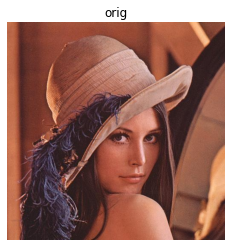

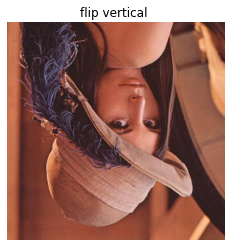

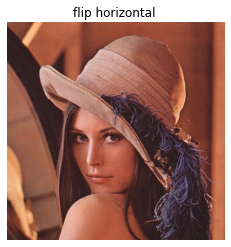

In [12]:
import numpy as np
import cv2

im = cv2.imread('lena.jpg')
matshow("orig", im)

# 进行垂直镜像
im_flip0 = cv2.flip(im, 0)
matshow("flip vertical ", im_flip0)

im_flip1 = cv2.flip(im, 1)
# 进行水平镜像
matshow("flip horizontal ", im_flip1)


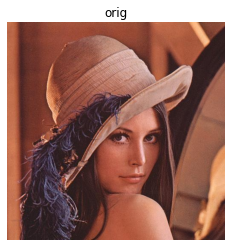

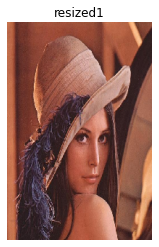

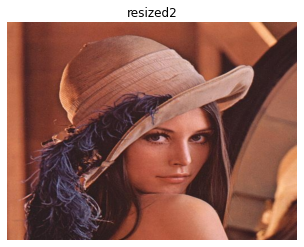

In [13]:
import numpy as np
import cv2

im = cv2.imread('lena.jpg')
matshow("orig", im)

# 获取图像尺寸
(h, w) = im.shape[:2]

# 缩放的目标尺寸
dst_size = (200,300)

# 最邻近插值
method = cv2.INTER_NEAREST

# 进行缩放
resized = cv2.resize(im, dst_size, interpolation = method)
matshow("resized1", resized)

# 缩放的目标尺寸
dst_size = (800,600)
# 双线性插值
method = cv2.INTER_LINEAR

# 进行缩放
resized = cv2.resize(im, dst_size, interpolation = method)
matshow("resized2", resized)


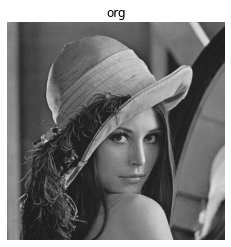

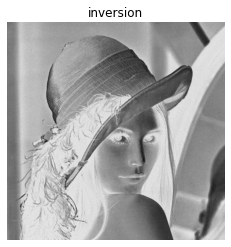

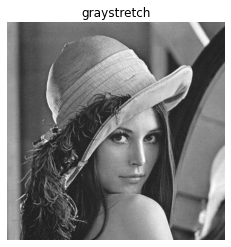

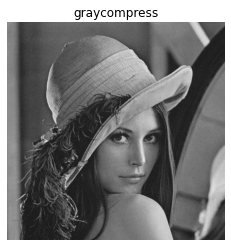

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 定义线性灰度变化函数
# k>1时 实现灰度数值的拉伸
# 0<k<1时 实现灰度数值的压缩
# k=-1 b=255 实现灰度反转
def linear_trans(img, k, b=0):
    # 计算灰度线性变化的映射表
    trans_list = [(np.float32(x)*k+b) for x in range(256)]
    # 将列表转换为np.array
    trans_table =np.array(trans_list)
    # 将超过[0,255]灰度范围的数值进行调整,并指定数据类型为uint8
    trans_table[trans_table>255] = 255
    trans_table[trans_table<0] = 0
    trans_table = np.round(trans_table).astype(np.uint8)
    # 使用OpenCV的look up table函数修改图像的灰度值
    return cv2.LUT(img, trans_table)

im = cv2.imread('lena.jpg',0)
matshow('org', im)

# 反转
im_inversion = linear_trans(im, -1, 255)
matshow('inversion', im_inversion)
# 灰度拉伸
im_stretch = linear_trans(im, 1.2)
matshow('graystretch', im_stretch)
# 灰度压缩
im_compress = linear_trans(im, 0.8)
matshow('graycompress', im_compress)


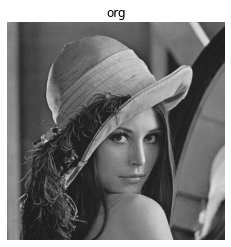

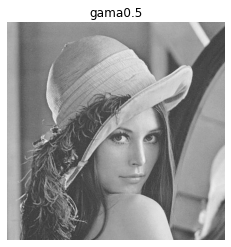

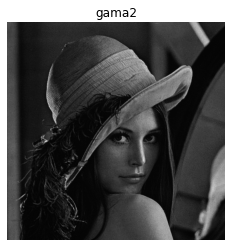

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 定义伽马变化函数
def gamma_trans(img, gamma):
    # 先归一化到1，做伽马计算，再还原到[0,255]
    gamma_list = [np.power(x / 255.0, gamma) * 255.0 for x in range(256)]
    # 将列表转换为np.array，并指定数据类型为uint8
    gamma_table = np.round(np.array(gamma_list)).astype(np.uint8)
    # 使用OpenCV的look up table函数修改图像的灰度值
    return cv2.LUT(img, gamma_table)

im = cv2.imread('lena.jpg',0)
matshow('org', im)

# 使用伽马值为0.5的变化，实现对暗部的拉升，亮部的压缩
im_gama05 = gamma_trans(im, 0.5)
matshow('gama0.5', im_gama05)
# 使用伽马值为2的变化，实现对亮部的拉升，暗部的压缩
im_gama2 = gamma_trans(im, 2)
matshow('gama2', im_gama2)


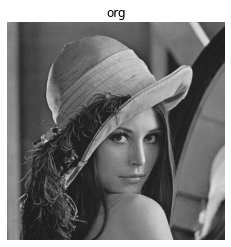

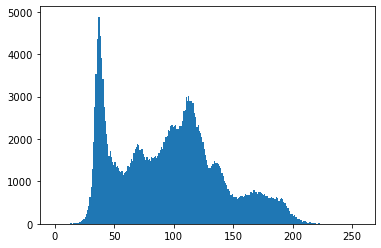

In [16]:
import cv2
from matplotlib import pyplot as plt
# 读取并显示图像
im = cv2.imread("lena.jpg",0)
matshow('org', im)

# 绘制灰度图像的直方图
plt.hist(im.ravel(), 256, [0,256])
plt.show()


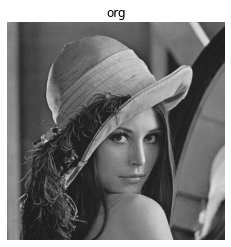

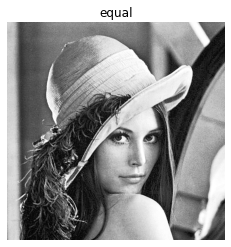

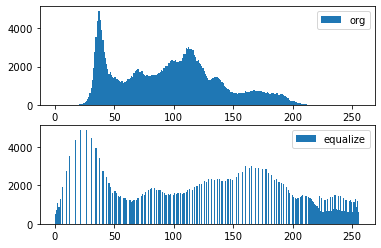

In [17]:
import cv2
from matplotlib import pyplot as plt

im = cv2.imread("lena.jpg",0)
matshow('org', im)

# 调用OpenCV的直方图均衡化API
im_equ1 = cv2.equalizeHist(im)
matshow('equal', im_equ1)

# 显示原始图像的直方图
plt.subplot(2,1,1)
plt.hist(im.ravel(), 256, [0,256],label='org')
plt.legend()

# 显示均衡化图像的直方图
plt.subplot(2,1,2)
plt.hist(im_equ1.ravel(), 256, [0,256],label='equalize')
plt.legend()
plt.show()


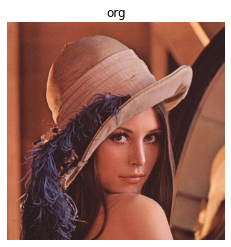

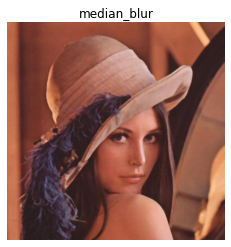

In [18]:
import cv2
import numpy as np

im = cv2.imread('lena.jpg')
matshow('org',im)

# 调用OpenCV的中值模糊API
im_medianblur = cv2.medianBlur(im, 5) 
  
matshow('median_blur',im_medianblur)


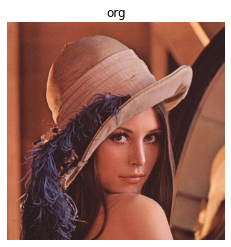

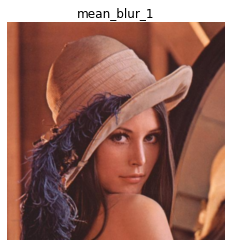

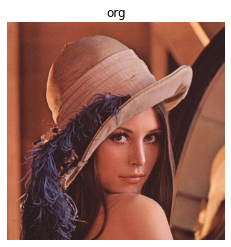

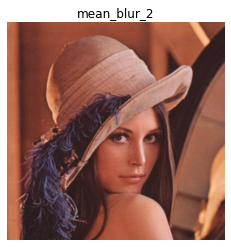

In [19]:
# 方法一：直接调用OpenCV的API
import cv2
import numpy as np

im = cv2.imread('lena.jpg')
matshow('org',im)

# 调用OpenCV的均值模糊API
im_meanblur1 = cv2.blur(im, (3, 3)) 

matshow('mean_blur_1',im_meanblur1)



# 方法二：使用均值算子和filter2D 自定义滤波操作
import cv2
import numpy as np

im = cv2.imread('lena.jpg')
matshow('org',im)
# 均值算子
mean_blur = np.ones([3, 3], np.float32)/9

# 使用filter2D进行滤波操作
im_meanblur2 = cv2.filter2D(im,-1,mean_blur)
matshow('mean_blur_2',im_meanblur2)


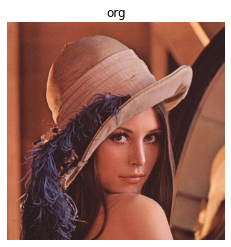

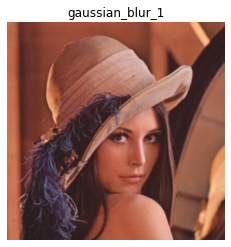

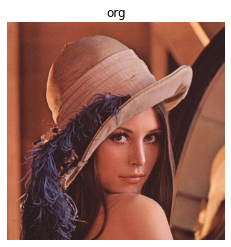

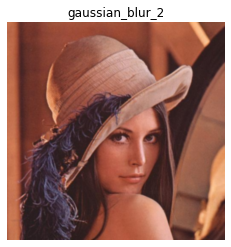

In [20]:
# 方法一：直接调用OpenCV的API
import cv2
import numpy as np

im = cv2.imread('lena.jpg')
matshow('org',im)

# 调用OpenCV的高斯模糊API
im_gaussianblur1 = cv2.GaussianBlur(im, (5, 5), 0) 

matshow('gaussian_blur_1',im_gaussianblur1)


# 方法二：使用高斯算子和filter2D 自定义滤波操作
import cv2
import numpy as np

im = cv2.imread('lena.jpg')
matshow('org',im)
# 高斯算子
gaussian_blur = np.array([
    [1,4,7,4,1],
    [4,16,26,16,4],
    [7,26,41,26,7],
    [4,16,26,16,4],
    [1,4,7,4,1]], np.float32)/273

# 使用filter2D进行滤波操作
im_gaussianblur2 = cv2.filter2D(im,-1,gaussian_blur)
matshow('gaussian_blur_2',im_gaussianblur2)


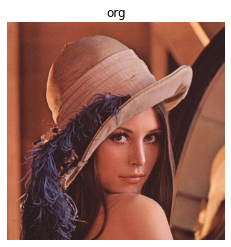

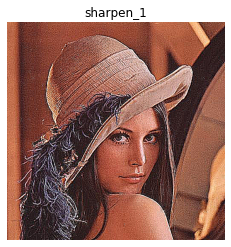

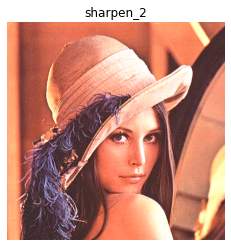

In [21]:
import cv2
import numpy as np

im = cv2.imread('lena.jpg')
matshow('org',im)
# 锐化算子
sharpen_1 = np.array([
        [-1,-1,-1],
        [-1,9,-1],
        [-1,-1,-1]])
# 使用filter2D进行滤波操作
im_sharpen1 = cv2.filter2D(im,-1,sharpen_1)
matshow('sharpen_1',im_sharpen1)

# 锐化算子2
sharpen_2 = np.array([
        [0,-1,0],
        [-1,8,-1],
        [0,1,0]])/4.0

# 使用filter2D进行滤波操作
im_sharpen2 = cv2.filter2D(im,-1,sharpen_2)
matshow('sharpen_2',im_sharpen2)
